In [45]:
import numpy as np

class NeuralNetwork(object):
    def __init__(self, learning_rate, epoch, random_seed=None):
        self.w_ = []
        self.learning_rate = learning_rate
        self.epoch = epoch
        self.errors_ = []
        if random_seed is not None:
            self.rand_generator = np.random.RandomState(random_seed)
        else:
            self.rand_generator = np.random.RandomState()

    def train(self, X, y):
        n_count = X.shape[1] + 1
        self.w_ = self.rand_generator.normal(loc=0, scale=0.1, size=n_count)
        print(self.w_)
        for _ in range(self.epoch):
            error = 0
            for xi, yi in zip(X, y):
                update = self.learning_rate * (yi - self.predict(xi))
                self.w_[1:] += update * xi
                self.w_[0] += update
                error += int(update != 0)
                # print(self.w_)
            self.errors_.append(error)

        return self

    def net_input(self, X):
        return np.dot(X, self.w_[1:]) + self.w_[0]

    def predict(self, X):
        return np.where(self.net_input(X) > 0, 1, 0)

[ 0.098723    0.03294759 -0.05811927]


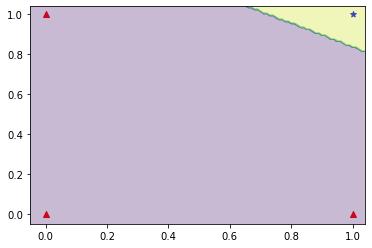

In [77]:
import matplotlib.pyplot as plt
X = np.array([[1, 1], [1, 0], [0, 1], [0, 0]])
y = np.array([1, 0, 0, 0])

nn = NeuralNetwork(learning_rate=0.01, epoch=50)
nn.train(X, y)

y_pred = nn.predict(X)

plt.scatter(X[y==1, 0], X[y==1, 1], c='blue', marker='*')
plt.scatter(X[y==0, 0], X[y==0, 1], c='red', marker='^')

x1_min, x1_max = X[:, 0].min() - 0.05, X[:, 0].max() + 0.05
x2_min, x2_max = X[:, 1].min() - 0.05, X[:, 1].max() + 0.05
xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, 0.01), np.arange(x2_min, x2_max, 0.01))
Z = nn.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
Z = Z.reshape(xx1.shape)
plt.contourf(xx1, xx2, Z, alpha=0.3)
plt.show()